In [1]:
from hive import hive

In [2]:
gc_data=hive('data/gc_*.conf')
p_data=hive('data/p_*.conf')

print(len(gc_data._collective_mu))

2345


/usr/lib64/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import tensorflow as tf
from model.dense import model_fn
from model.data_pipeline import get_input_fn
from model.data_pipeline import get_predict_input_fn
from model.data_pipeline import get_mu_input_fn

In [4]:
p_predict_input_fn,p_predict_init_hook=get_predict_input_fn(p_data)
p_estimator=tf.estimator.Estimator(model_fn=model_fn,model_dir='logp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f63bc8608d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [5]:
p_predictions=p_estimator.predict(input_fn=p_predict_input_fn,hooks=[p_predict_init_hook])

In [6]:
from numpy import linspace
x=linspace(0,2,20)
y=linspace(0,0.5,20)

In [7]:
predicted_rho_from_p=[x[0] for x in p_predictions]

[[2.       0.416683]
 [2.       0.416683]
 [2.       0.416683]
 ...
 [0.500075 0.250075]
 [0.500075 0.250075]
 [0.500075 0.250075]]
[[0.         0.        ]
 [0.10526316 0.02631579]
 [0.21052632 0.05263158]
 [0.31578947 0.07894737]
 [0.42105263 0.10526316]
 [0.52631579 0.13157895]
 [0.63157895 0.15789474]
 [0.73684211 0.18421053]
 [0.84210526 0.21052632]
 [0.94736842 0.23684211]
 [1.05263158 0.26315789]
 [1.15789474 0.28947368]
 [1.26315789 0.31578947]
 [1.36842105 0.34210526]
 [1.47368421 0.36842105]
 [1.57894737 0.39473684]
 [1.68421053 0.42105263]
 [1.78947368 0.44736842]
 [1.89473684 0.47368421]
 [2.         0.5       ]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logp/model.ckpt-60100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Initializing iterator


In [8]:
print(x)
print(y)
print(predicted_rho_from_p)

[0.         0.10526316 0.21052632 0.31578947 0.42105263 0.52631579
 0.63157895 0.73684211 0.84210526 0.94736842 1.05263158 1.15789474
 1.26315789 1.36842105 1.47368421 1.57894737 1.68421053 1.78947368
 1.89473684 2.        ]
[0.         0.02631579 0.05263158 0.07894737 0.10526316 0.13157895
 0.15789474 0.18421053 0.21052632 0.23684211 0.26315789 0.28947368
 0.31578947 0.34210526 0.36842105 0.39473684 0.42105263 0.44736842
 0.47368421 0.5       ]
[0.002254890292997004, 0.008446878687851114, 0.014318295237627184, 0.023400615791232295, 0.037361455000729904, 0.05598951484819095, 0.07827359289366478, 0.10319164863630546, 0.12995652750886882, 0.15798763611372243, 0.1868207951261494, 0.2160373314821868, 0.24522776623989584, 0.27398438883927745, 0.30191265321774063, 0.32865164998652296, 0.3538955234786624, 0.37740997418510414, 0.3990406423981737, 0.4187127483140979]


<IPython.core.display.Javascript object>


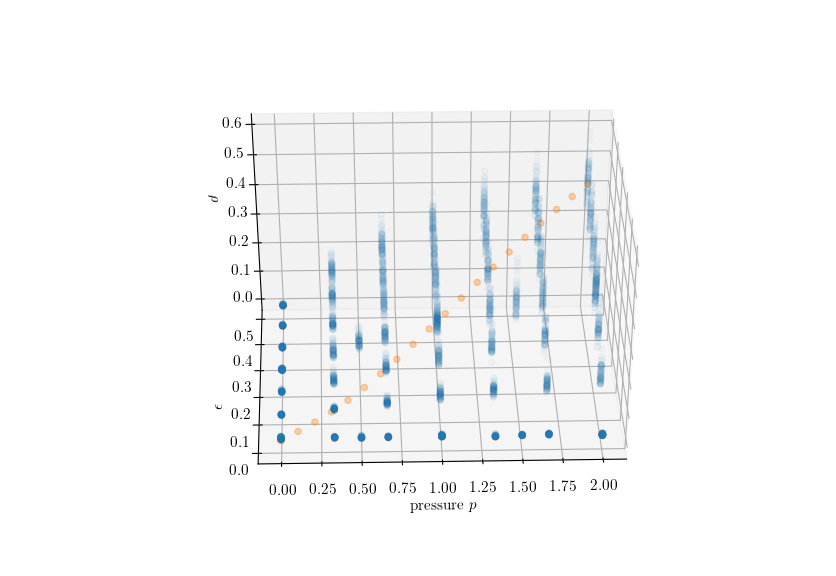

In [9]:
%matplotlib notebook
from matplotlib.pyplot import show,plot,figure
from mpl_toolkits.mplot3d import Axes3D
fig=figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(p_data._collective_pressure,p_data._collective_epsilon,p_data._collective_rho,alpha=0.03)
#ax.scatter(p_data._collective_pressure,p_data._collective_epsilon,predicted_rho_from_p,alpha=0.33)
ax.scatter(x,y,predicted_rho_from_p,alpha=0.33)
ax.set_xlabel(r"pressure $p$")
ax.set_ylabel(r"$\epsilon$")
ax.set_zlabel(r"$\rho$")
show()

In [ ]:
mu_train_input_fn,mu_predict_input_fn,mu_train_init_hook=get_mu_input_fn(gc_data)
mu_estimator=tf.estimator.Estimator(model_fn=model_fn,model_dir='logmu')

In [ ]:
mu_predictions=mu_estimator.predict(input_fn=mu_predict_input_fn,hooks=[mu_train_init_hook])
predicted_rho_from_mu=[x[0] for x in mu_predictions]

In [ ]:
fig=figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(gc_data._collective_mu,gc_data._collective_epsilon,gc_data._collective_rho,alpha=0.03)
ax.scatter(gc_data._collective_mu,gc_data._collective_epsilon,predicted_rho_from_mu,alpha=0.03)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\epsilon$")
ax.set_zlabel(r"$\rho$")
show()